# **Análisis de Demanda y Precio de la Electricidad en Italia**

En este notebook vamos a realizar un análisis de la **demanda** y los **precios de la electricidad** en diversas zonas de Italia. El DataFrame contiene datos históricos de consumo de electricidad y precios en diferentes regiones italianas. Las unidades de medida de los datos son las siguientes:

- **Demanda de electricidad** en **megavatios hora (MWh)**.
- **Precios de la electricidad** en **euros por megavatio hora (€/MWh)**.
  
Este análisis nos permitirá explorar las tendencias y patrones relacionados con la demanda y los precios de la electricidad a lo largo del tiempo y en distintas zonas.

¡Comencemos! 

In [454]:
# importamos la librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [455]:
# vamos a cargar el nuevo dataframe cargado en el csv DEMANDA_PRECIOS.csv

df = pd.read_csv('datasets_limpiados/DEMANDA_PRECIOS.csv')
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87671 entries, 0 to 87670
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   87671 non-null  datetime64[ns]
 1   ITALIA_DEMAND          87671 non-null  float64       
 2   CNOR_DEMAND            87671 non-null  float64       
 3   CSUD_DEMAND            87671 non-null  float64       
 4   NORD_DEMAND            87671 non-null  float64       
 5   SARD_DEMAND            87671 non-null  float64       
 6   SICI_DEMAND            87671 non-null  float64       
 7   SUD_DEMAND             87671 non-null  float64       
 8   YEAR                   87671 non-null  int64         
 9   MONTH                  87671 non-null  object        
 10  SEASON                 87671 non-null  object        
 11  TIME_OF_DAY            87671 non-null  object        
 12  UNIQUE_NATIONAL_PRICE  87671 non-null  float64       
 13  U

# Análisis de Precios de la Electricidad

En este análisis, hemos formulado algunas preguntas clave sobre los **precios de la electricidad** en las diferentes zonas de Italia. A continuación, planteamos las preguntas que vamos a abordar utilizando **Python** para extraer las respuestas de los datos:

### Sobre precios:
1. ¿En qué año los precios de la electricidad fueron más altos en cada zona (NORD, SARD, SICI, SUD, etc.)?
2. ¿Cuál ha sido la tendencia de los precios en cada zona a lo largo de los años? (¿Están subiendo o bajando?)
3. ¿Qué mes del año suele tener los precios más altos en cada zona?
4. ¿En qué estación del año (invierno, verano, etc.) los precios son más altos?
5. ¿A qué hora del día (mañana, tarde, noche) los precios suelen ser más altos?
6. ¿Qué zona tiene el precio promedio más alto y cuál el más bajo a lo largo de todos los años?
7. ¿Cómo se relaciona el precio único nacional con los precios por zona? (¿Son similares o hay grandes diferencias?)

In [456]:
# PREGUNTA 1 1.	¿En qué año los precios de la electricidad fueron más altos en cada zona (NORD, SARD, SICI, SUD, etc.)?

# Crear un diccionario para las zonas de precios
zonas_precio = ['NORD_PRICE', 'SARDINA_PRICE', 'SICILY_PRICE', 'SUD_PRICE', 'SUD_CENTER_PRICE', 'NORD_CENTER_PRICE']

# Crear un DataFrame vacío para almacenar los resultados
resultados = {}

# Iterar sobre las zonas de precio y encontrar el año con el precio más alto
for zona in zonas_precio:
    # Agrupar por año y obtener el valor máximo para cada año
    precios_maximos = df.groupby('YEAR')[zona].max()
    # Encontrar el año en que el precio fue más alto
    anio_max = precios_maximos.idxmax()
    # Obtener el precio máximo correspondiente a ese año
    precio_max = precios_maximos.max()
    # Almacenar el resultado
    resultados[zona] = {'Año': anio_max, 'Precio máximo': precio_max}

# Convertir los resultados en un DataFrame
resultados_df = pd.DataFrame.from_dict(resultados, orient='index')

# Crear un mensaje para mostrar los resultados
mensaje = f"Análisis de los precios máximos de electricidad por zona:\n\n"

# Añadir los resultados al mensaje
for zona, datos in resultados.items():
    mensaje += f"Zona: {zona.replace('_', ' ').title()}\n"
    mensaje += f"Año con el precio más alto: {datos['Año']}\n"
    mensaje += f"Precio máximo en ese año: {datos['Precio máximo']:.2f} €/MWh\n\n"

# Mostrar el mensaje por consola
print(mensaje)

Análisis de los precios máximos de electricidad por zona:

Zona: Nord Price
Año con el precio más alto: 2021
Precio máximo en ese año: 555.00 €/MWh

Zona: Sardina Price
Año con el precio más alto: 2021
Precio máximo en ese año: 533.19 €/MWh

Zona: Sicily Price
Año con el precio más alto: 2012
Precio máximo en ese año: 3000.00 €/MWh

Zona: Sud Price
Año con el precio más alto: 2021
Precio máximo en ese año: 533.19 €/MWh

Zona: Sud Center Price
Año con el precio más alto: 2021
Precio máximo en ese año: 533.19 €/MWh

Zona: Nord Center Price
Año con el precio más alto: 2021
Precio máximo en ese año: 555.00 €/MWh




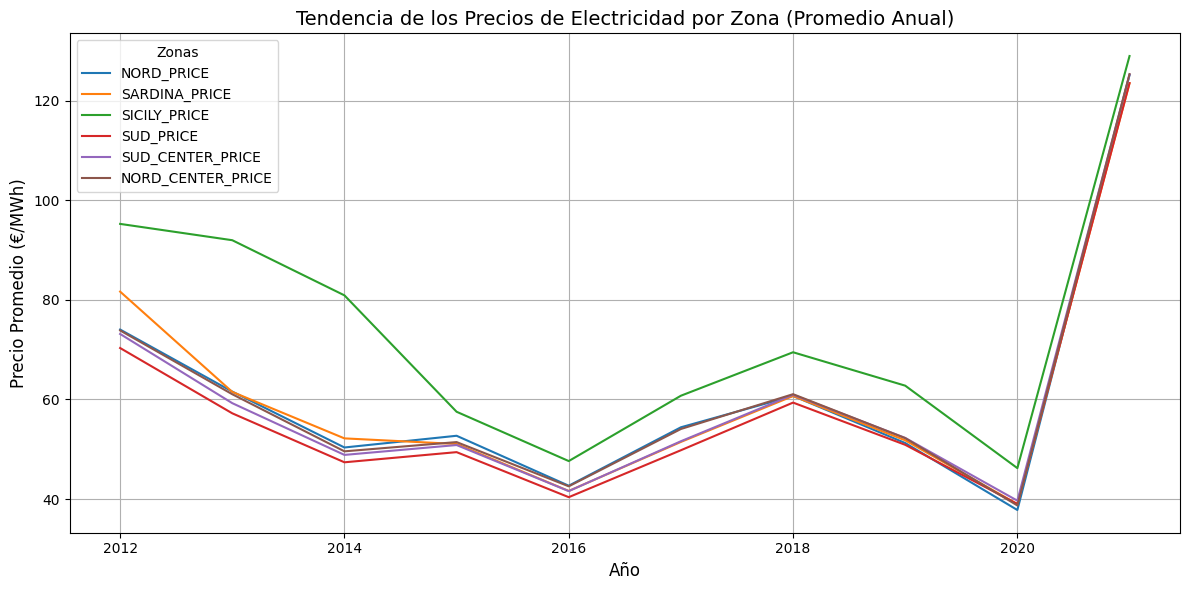

In [457]:
# PREGUNTA 2 ¿Cuál ha sido la tendencia de los precios en cada zona a lo largo de los años? (¿Están subiendo o bajando?)

# Calcular el promedio anual para cada zona
tendencias = {}
for zona in zonas_precio:
    promedio_anual = df.groupby('YEAR', observed=True)[zona].mean()
    tendencias[zona] = promedio_anual

# Crear un DataFrame a partir de las tendencias
tendencias_df = pd.DataFrame(tendencias)

# Graficar las tendencias
plt.figure(figsize=(12, 6))
for zona in zonas_precio:
    plt.plot(tendencias_df.index, tendencias_df[zona], label=zona)

# Personalizar el gráfico
plt.title("Tendencia de los Precios de Electricidad por Zona (Promedio Anual)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio Promedio (€/MWh)", fontsize=12)
plt.legend(title="Zonas")
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [458]:
# PREGUNTA 3 3.	¿Qué mes del año suele tener los precios más altos en cada zona?

# Crear un diccionario para almacenar los resultados por zona
resultados_meses = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Agrupar por mes y calcular el promedio de los precios
    precios_por_mes = df.groupby('MONTH', observed=True)[zona].mean()
    # Encontrar el mes con el precio más alto
    mes_max = precios_por_mes.idxmax()
    # Obtener el precio promedio más alto
    precio_max = precios_por_mes.max()
    # Almacenar el resultado
    resultados_meses[zona] = {'Mes': mes_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame para mejor visualización
resultados_meses_df = pd.DataFrame.from_dict(resultados_meses, orient='index')

# Mostrar los resultados
print("Resultados por mes para cada zona:")
print(resultados_meses_df)

Resultados por mes para cada zona:
                        Mes  Precio promedio más alto
NORD_PRICE         December                 81.987348
SARDINA_PRICE      December                 79.098060
SICILY_PRICE       December                 89.062563
SUD_PRICE          December                 77.226637
SUD_CENTER_PRICE   December                 79.666093
NORD_CENTER_PRICE  December                 82.024329


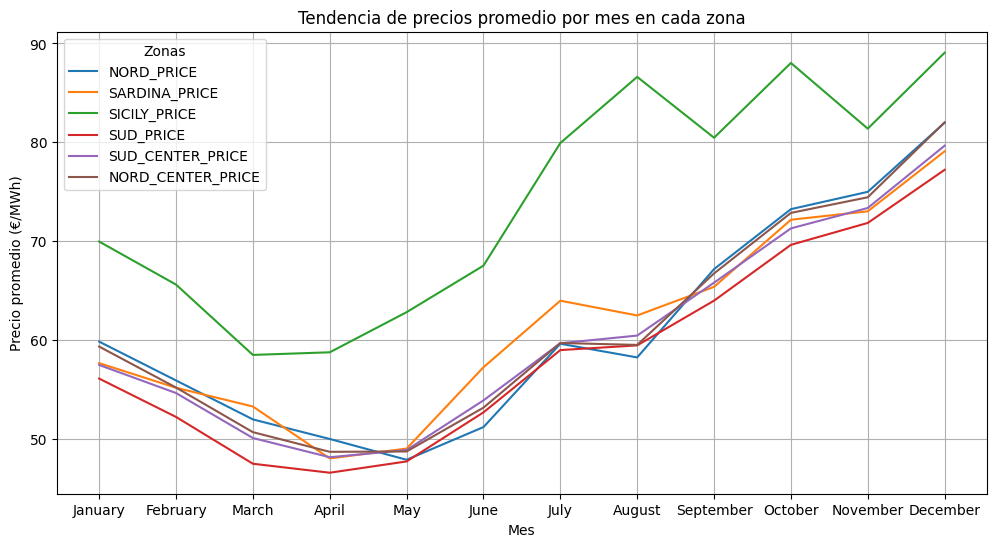

In [459]:
# Crear una lista con el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convertir la columna 'MONTH' a un tipo categórico con el orden correcto
df['MONTH'] = pd.Categorical(df['MONTH'], categories=orden_meses, ordered=True)

# Crear un gráfico de líneas para las zonas de precio
plt.figure(figsize=(12, 6))
for zona in zonas_precio:
    precios_por_mes = df.groupby('MONTH', observed=True)[zona].mean()
    plt.plot(precios_por_mes.index, precios_por_mes.values, label=zona)

# Configuración del gráfico
plt.title('Tendencia de precios promedio por mes en cada zona')
plt.xlabel('Mes')
plt.ylabel('Precio promedio (€/MWh)')
plt.legend(title="Zonas")
plt.grid(True)
plt.show()

In [460]:
# PREGUNTA 4 ¿En qué estación del año (invierno, verano, etc.) los precios son más altos?
resultados_estaciones = {}

# Iterar sobre las zonas de precio y encontrar la estación con el precio promedio más alto
for zona in zonas_precio:
    # Agrupar por estación y calcular el promedio de los precios
    precios_estaciones = df.groupby('SEASON', observed=True)[zona].mean()
    # Encontrar la estación con el precio promedio más alto
    estacion_max = precios_estaciones.idxmax()
    # Obtener el precio promedio más alto correspondiente a esa estación
    precio_max = precios_estaciones.max()
    # Almacenar el resultado
    resultados_estaciones[zona] = {'Estación': estacion_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame
resultados_estaciones_df = pd.DataFrame.from_dict(resultados_estaciones, orient='index')

# Mostrar el DataFrame
print(resultados_estaciones_df)

                  Estación  Precio promedio más alto
NORD_PRICE          Autumn                 71.829263
SARDINA_PRICE       Autumn                 70.223936
SICILY_PRICE        Autumn                 83.346000
SUD_PRICE           Autumn                 68.513727
SUD_CENTER_PRICE    Autumn                 70.176905
NORD_CENTER_PRICE   Autumn                 71.376104


In [461]:
# PREGUNTA 5 ¿A qué hora del día (mañana, tarde, noche) los precios suelen ser más altos?

# # Crear un diccionario para almacenar los resultados por hora del día
resultados_hora = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Agrupar por hora del día y calcular el precio promedio
    precios_por_hora = df.groupby('TIME_OF_DAY', observed=True)[zona].mean()
    # Encontrar la hora del día con el precio más alto
    hora_max = precios_por_hora.idxmax()
    # Obtener el precio promedio más alto
    precio_max = precios_por_hora.max()
    # Almacenar el resultado
    resultados_hora[zona] = {'Hora del día': hora_max, 'Precio promedio más alto': precio_max}

# Convertir los resultados en un DataFrame para mejor visualización
resultados_hora_df = pd.DataFrame.from_dict(resultados_hora, orient='index')

# Mostrar los resultados
print("Resultados por hora del día para cada zona:")
print(resultados_hora_df)

Resultados por hora del día para cada zona:
                  Hora del día  Precio promedio más alto
NORD_PRICE             Evening                 69.558482
SARDINA_PRICE          Evening                 74.929635
SICILY_PRICE           Evening                 99.327822
SUD_PRICE              Evening                 70.566432
SUD_CENTER_PRICE       Evening                 71.439451
NORD_CENTER_PRICE      Evening                 71.142788


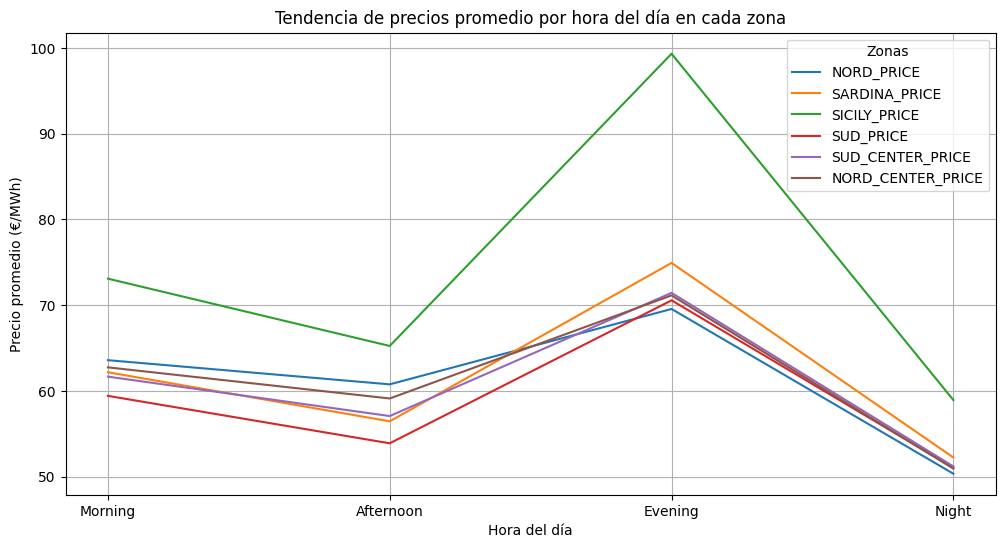

In [462]:
# Definir el orden correcto de las partes del día
orden_partes_dia = ['Morning', 'Afternoon', 'Evening', 'Night']

# Asegurarnos de que la columna 'TIME_OF_DAY' esté en el orden correcto
df['TIME_OF_DAY'] = pd.Categorical(df['TIME_OF_DAY'], categories=orden_partes_dia, ordered=True)

# Crear un gráfico de líneas para las zonas de precio
plt.figure(figsize=(12, 6))

# Iterar sobre las zonas de precios y graficar
for zona in zonas_precio:
    # Agrupar por hora del día y calcular el precio promedio
    precios_por_hora = df.groupby('TIME_OF_DAY', observed=True)[zona].mean()
    
    # Graficar la zona
    plt.plot(precios_por_hora.index, precios_por_hora.values, label=zona)

# Configuración del gráfico
plt.title('Tendencia de precios promedio por hora del día en cada zona')
plt.xlabel('Hora del día')
plt.ylabel('Precio promedio (€/MWh)')
plt.legend(title="Zonas")
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [463]:
# Revisa las categorías de TIME_OF_DAY y sus conteos
print(df['TIME_OF_DAY'].value_counts())

TIME_OF_DAY
Morning      21918
Afternoon    21918
Evening      21918
Night        21917
Name: count, dtype: int64


In [464]:
# PREGUNTA 6 ¿Qué zona tiene el precio promedio más alto y cuál el más bajo a lo largo de todos los años?
# Crear un diccionario para almacenar los resultados
resultados_zonas = {}

# Iterar sobre las zonas de precios
for zona in zonas_precio:
    # Calcular el precio promedio a lo largo de todos los años
    precio_promedio = df[zona].mean()
    # Almacenar el resultado
    resultados_zonas[zona] = precio_promedio

# Convertir los resultados en un DataFrame para mejor visualización
resultados_zonas_df = pd.DataFrame.from_dict(resultados_zonas, orient='index', columns=['Precio Promedio'])

# Encontrar la zona con el precio promedio más alto y más bajo
zona_max_precio = resultados_zonas_df['Precio Promedio'].idxmax()  # Índice del precio máximo
zona_min_precio = resultados_zonas_df['Precio Promedio'].idxmin()  # Índice del precio mínimo
precio_max = resultados_zonas_df['Precio Promedio'].max()  
precio_min = resultados_zonas_df['Precio Promedio'].min()  

# Mostrar los resultados
print("Precio promedio por zona a lo largo de todos los años:")
print(resultados_zonas_df)
print(f"\nLa zona con el precio promedio más alto es {zona_max_precio} con un precio de {precio_max:.2f} €/MWh.")
print(f"La zona con el precio promedio más bajo es {zona_min_precio} con un precio de {precio_min:.2f} €/MWh.")

Precio promedio por zona a lo largo de todos los años:
                   Precio Promedio
NORD_PRICE               61.063504
SARDINA_PRICE            61.447919
SICILY_PRICE             74.149028
SUD_PRICE                58.727285
SUD_CENTER_PRICE         60.342127
NORD_CENTER_PRICE        60.986257

La zona con el precio promedio más alto es SICILY_PRICE con un precio de 74.15 €/MWh.
La zona con el precio promedio más bajo es SUD_PRICE con un precio de 58.73 €/MWh.


In [465]:
# PREGUNTA 7 7.	¿Cómo se relaciona el precio único nacional con los precios por zona? (¿Son similares o hay grandes diferencias?)

# Calcular el precio promedio del precio único nacional
precio_nacional_promedio = df['UNIQUE_NATIONAL_PRICE'].mean()

# Mostrar los resultados de las zonas y el precio promedio nacional
print("Precio promedio por zona:")
print(resultados_zonas_df)

print(f"\nPrecio promedio del precio único nacional: {precio_nacional_promedio:.2f} €/MWh")

# Comparar la diferencia entre el precio único nacional y las zonas
diferencias = resultados_zonas_df['Precio Promedio'] - precio_nacional_promedio

# Mostrar las diferencias
print("\nDiferencia entre el precio único nacional y las zonas:")
print(diferencias)

# Responder a la pregunta de si hay grandes diferencias
if any(diferencias.abs() > 10):  # Si alguna diferencia es mayor a 10 €/MWh
    print("\nExisten diferencias significativas entre el precio único nacional y los precios por zona.")
    
    # Encontrar la zona con la diferencia más grande
    zona_con_gran_diferencia = diferencias.abs().idxmax()  # Zona con la mayor diferencia
    diferencia_maxima = diferencias.loc[zona_con_gran_diferencia]  # Valor de esa diferencia
    print(f"La zona con la mayor diferencia es {zona_con_gran_diferencia} con una diferencia de {diferencia_maxima:.2f} €/MWh.")
else:
    print("\nLas diferencias entre el precio único nacional y los precios por zona son pequeñas.")

Precio promedio por zona:
                   Precio Promedio
NORD_PRICE               61.063504
SARDINA_PRICE            61.447919
SICILY_PRICE             74.149028
SUD_PRICE                58.727285
SUD_CENTER_PRICE         60.342127
NORD_CENTER_PRICE        60.986257

Precio promedio del precio único nacional: 61.75 €/MWh

Diferencia entre el precio único nacional y las zonas:
NORD_PRICE           -0.686648
SARDINA_PRICE        -0.302233
SICILY_PRICE         12.398876
SUD_PRICE            -3.022866
SUD_CENTER_PRICE     -1.408025
NORD_CENTER_PRICE    -0.763894
Name: Precio Promedio, dtype: float64

Existen diferencias significativas entre el precio único nacional y los precios por zona.
La zona con la mayor diferencia es SICILY_PRICE con una diferencia de 12.40 €/MWh.


### Sobre demanda:

1. ¿Qué zona tiene la mayor demanda promedio de electricidad y cuál la menor?  
2. ¿En qué año cada zona tuvo su demanda más alta y más baja?  
3. ¿Qué mes del año tiene la mayor demanda de electricidad en cada zona?  
4. ¿Cómo varía la demanda según la hora del día (mañana, tarde, noche) en cada zona?  
5. ¿En qué estación del año la demanda de electricidad es más alta o más baja en cada zona?  
 

In [466]:
# PREGUNTA 1 ¿Qué zona tiene la mayor demanda promedio de electricidad y cuál la menor?

# Lista de las columnas de demanda por zona
zonas_demanda = ["CNOR_DEMAND", "CSUD_DEMAND", "NORD_DEMAND", "SARD_DEMAND", "SICI_DEMAND", "SUD_DEMAND"]

# Calculamos la demanda promedio para cada zona
demanda_promedio = df[zonas_demanda].mean().sort_values(ascending=False)

# Identificamos la zona con mayor y menor demanda promedio
zona_mayor_demanda = demanda_promedio.idxmax()
zona_menor_demanda = demanda_promedio.idxmin()

print(f"La zona con mayor demanda promedio es {zona_mayor_demanda} con {demanda_promedio.max():.2f} MW/h.")
print(f"La zona con menor demanda promedio es {zona_menor_demanda} con {demanda_promedio.min():.2f} MW/h.")

La zona con mayor demanda promedio es NORD_DEMAND con 18010.47 MW/h.
La zona con menor demanda promedio es SARD_DEMAND con 1100.92 MW/h.


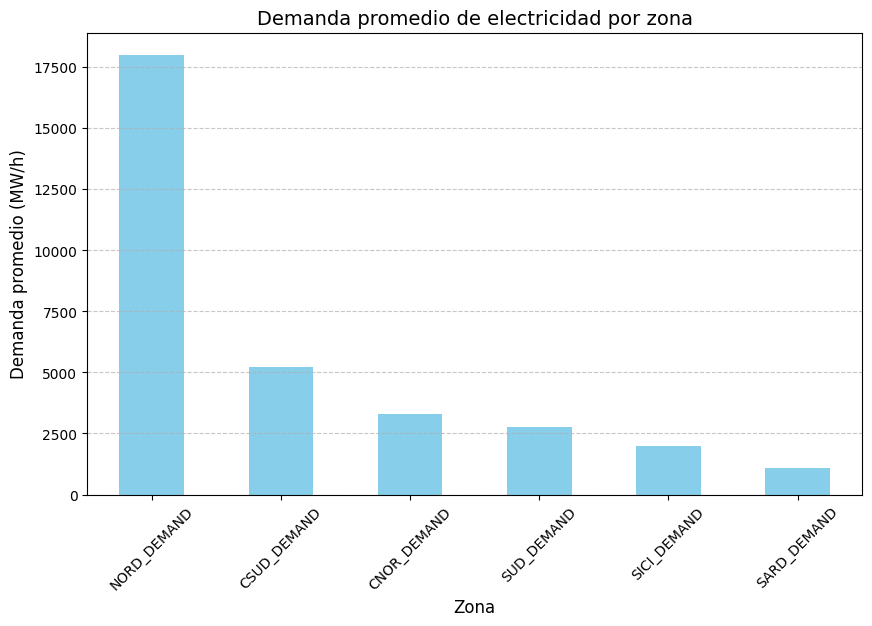

In [467]:
# Gráfico de barras para visualizar las demandas promedio
plt.figure(figsize=(10, 6))
demanda_promedio.plot(kind="bar", color="skyblue")
plt.title("Demanda promedio de electricidad por zona", fontsize=14)
plt.ylabel("Demanda promedio (MW/h)", fontsize=12)
plt.xlabel("Zona", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [468]:
# PREGUNTA 2 ¿En qué año cada zona tuvo su demanda más alta y más baja?

# Crear un diccionario para almacenar los resultados
resultados_zonas = {}

# Iteramos sobre cada zona de demanda
for zona in zonas_demanda:
    # Agrupar por año y sumar la demanda total por año
    demanda_por_anio = df.groupby("YEAR")[zona].sum()

    # Encontrar el año con la demanda máxima y mínima
    anio_max = demanda_por_anio.idxmax()  # Año con demanda máxima
    anio_min = demanda_por_anio.idxmin()  # Año con demanda mínima
    demanda_max = demanda_por_anio.max()  # Valor de la demanda máxima
    demanda_min = demanda_por_anio.min()  # Valor de la demanda mínima
    
    # Almacenar los resultados
    resultados_zonas[zona] = {
        "Año de máxima demanda": anio_max,
        "Demanda máxima (MW/h)": demanda_max,
        "Año de mínima demanda": anio_min,
        "Demanda mínima (MW/h)": demanda_min
    }

# Convertir los resultados a un DataFrame
resultados_zonas_df = pd.DataFrame.from_dict(resultados_zonas, orient='index')


# Mostrar los resultados en consola de manera detallada
print("Demanda máxima y mínima por zona a lo largo de todos los años:\n")
for zona, resultados in resultados_zonas.items():
    print(f"Zona: {zona}")
    print(f"Año con máxima demanda: {resultados['Año de máxima demanda']} - Demanda máxima (MW/h): {resultados['Demanda máxima (MW/h)']}")
    print(f"Año con mínima demanda: {resultados['Año de mínima demanda']} - Demanda mínima (MW/h): {resultados['Demanda mínima (MW/h)']}")
    print("-" * 80)  # Línea para separar cada zona
    

Demanda máxima y mínima por zona a lo largo de todos los años:

Zona: CNOR_DEMAND
Año con máxima demanda: 2012 - Demanda máxima (MW/h): 31579683.8
Año con mínima demanda: 2021 - Demanda mínima (MW/h): 24571089.904
--------------------------------------------------------------------------------
Zona: CSUD_DEMAND
Año con máxima demanda: 2021 - Demanda máxima (MW/h): 50616761.404
Año con mínima demanda: 2014 - Demanda mínima (MW/h): 40641830.842
--------------------------------------------------------------------------------
Zona: NORD_DEMAND
Año con máxima demanda: 2018 - Demanda máxima (MW/h): 164449556.309
Año con mínima demanda: 2020 - Demanda mínima (MW/h): 150708048.634
--------------------------------------------------------------------------------
Zona: SARD_DEMAND
Año con máxima demanda: 2012 - Demanda máxima (MW/h): 12631079.831
Año con mínima demanda: 2020 - Demanda mínima (MW/h): 8405580.506
--------------------------------------------------------------------------------
Zona:

In [469]:
# PREGUNTA 3 ¿Qué mes del año tiene la mayor demanda de electricidad en cada zona?

# Crear un diccionario para almacenar los resultados
resultados_zonas_mes = {}

# Iteramos sobre cada zona de demanda
for zona in zonas_demanda:
    # Agrupar por mes y obtener la demanda máxima para cada mes
    demanda_por_mes = df.groupby("MONTH", observed=True)[zona].max()

    # Ahora, encontramos el mes con la mayor demanda usando idxmax() sobre la serie de demanda máxima por mes
    mes_max = demanda_por_mes.idxmax()  # El mes con la mayor demanda
    demanda_max = demanda_por_mes.max()  # Demanda máxima en ese mes

    # Almacenar los resultados en el diccionario
    resultados_zonas_mes[zona] = {
        "Mes con mayor demanda": mes_max,
        "Demanda máxima en mes (MW/h)": demanda_max
    }

# Convertir los resultados en un DataFrame
resultados_zonas_mes_df = pd.DataFrame.from_dict(resultados_zonas_mes, orient='index')

# Mostrar los resultados en consola de manera detallada
print("Mes con la mayor demanda de electricidad por zona:")
for zona, resultados in resultados_zonas_mes.items():
    print(f"Zona: {zona}")
    print(f"Mes con mayor demanda: {resultados['Mes con mayor demanda']} - Demanda máxima en mes (MW/h): {resultados['Demanda máxima en mes (MW/h)']}")
    print("-" * 80)  # Separador para mejor presentación
    

Mes con la mayor demanda de electricidad por zona:
Zona: CNOR_DEMAND
Mes con mayor demanda: July - Demanda máxima en mes (MW/h): 6007.45
--------------------------------------------------------------------------------
Zona: CSUD_DEMAND
Mes con mayor demanda: July - Demanda máxima en mes (MW/h): 8899.763
--------------------------------------------------------------------------------
Zona: NORD_DEMAND
Mes con mayor demanda: July - Demanda máxima en mes (MW/h): 29379.431
--------------------------------------------------------------------------------
Zona: SARD_DEMAND
Mes con mayor demanda: October - Demanda máxima en mes (MW/h): 3136.701
--------------------------------------------------------------------------------
Zona: SICI_DEMAND
Mes con mayor demanda: July - Demanda máxima en mes (MW/h): 3445.039
--------------------------------------------------------------------------------
Zona: SUD_DEMAND
Mes con mayor demanda: March - Demanda máxima en mes (MW/h): 5216.077
-------------------

In [470]:
# PREGUNTA 4 ¿Cómo varía la demanda según la hora del día (mañana, tarde, noche) en cada zona?

# Crear un diccionario para almacenar los resultados por hora del día
resultados_demanda_hora = {}

# Iterar sobre las zonas de demanda
for zona in zonas_demanda:
    # Agrupar por hora del día y calcular la demanda promedio
    demanda_por_hora = df.groupby('TIME_OF_DAY')[zona].mean()
    # Almacenar los resultados
    resultados_demanda_hora[zona] = demanda_por_hora

# Convertir los resultados en un DataFrame para mejor visualización
resultados_demanda_hora_df = pd.DataFrame(resultados_demanda_hora)
print(resultados_demanda_hora_df)

             CNOR_DEMAND  CSUD_DEMAND   NORD_DEMAND  SARD_DEMAND  SICI_DEMAND  \
TIME_OF_DAY                                                                     
Morning      3392.832604  5139.740514  19152.500235  1110.347649  1957.655547   
Afternoon    3599.265154  5657.385446  20068.874321  1111.855528  2099.899057   
Evening      3706.977175  6005.910531  18920.707798  1239.089778  2319.958680   
Night        2564.174976  4024.708840  13899.602624   942.370523  1620.297472   

              SUD_DEMAND  
TIME_OF_DAY               
Morning      2732.142341  
Afternoon    2890.340616  
Evening      3228.320588  
Night        2263.041292  


C:\Users\febbr\AppData\Local\Temp\ipykernel_6044\1846950963.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demanda_por_hora = df.groupby('TIME_OF_DAY')[zona].mean()


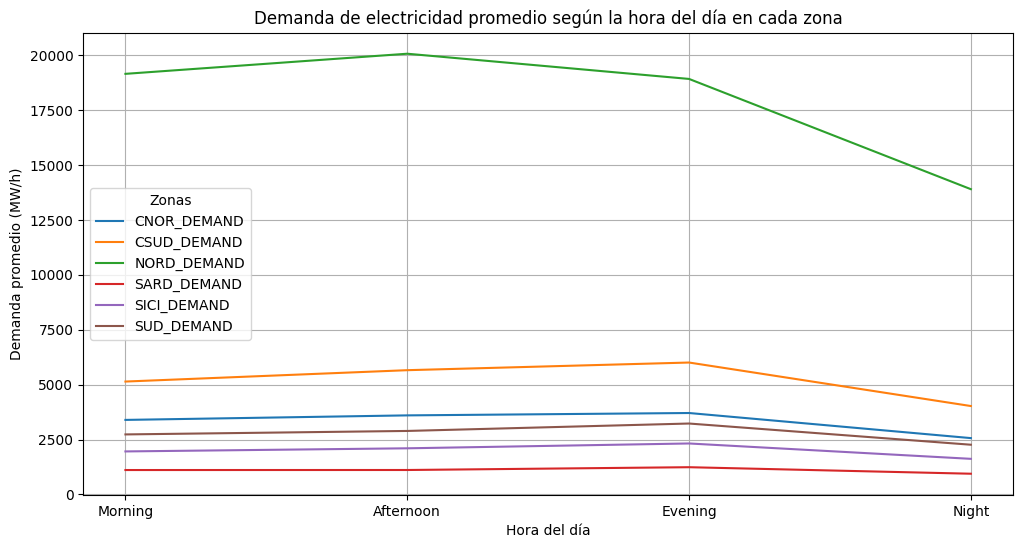

In [471]:
plt.figure(figsize=(12, 6))

# Iterar sobre cada zona de demanda
for zona in zonas_demanda:
    # Agrupar por hora del día y calcular la media de la demanda
    demanda_por_hora = df.groupby('TIME_OF_DAY', observed=True)[zona].mean()
    
    # Graficar la demanda promedio de cada zona según la hora del día
    plt.plot(demanda_por_hora.index, demanda_por_hora.values, label=zona)

# Configuración del gráfico
plt.title('Demanda de electricidad promedio según la hora del día en cada zona')
plt.xlabel('Hora del día')
plt.ylabel('Demanda promedio (MW/h)')
plt.legend(title="Zonas")
plt.grid(True)
plt.show()

            Estación con mayor demanda  Demanda máxima  \
CNOR_DEMAND                     Summer     3406.295755   
CSUD_DEMAND                     Summer     5467.843135   
NORD_DEMAND                     Winter    18408.487078   
SARD_DEMAND                     Summer     1174.888710   
SICI_DEMAND                     Summer     2156.288085   
SUD_DEMAND                      Summer     3024.417278   

            Estación con menor demanda  Demanda mínima  
CNOR_DEMAND                     Spring     3186.581510  
CSUD_DEMAND                     Spring     4894.168375  
NORD_DEMAND                     Spring    17206.005822  
SARD_DEMAND                     Autumn     1019.321659  
SICI_DEMAND                     Spring     1849.101356  
SUD_DEMAND                      Spring     2595.681872  


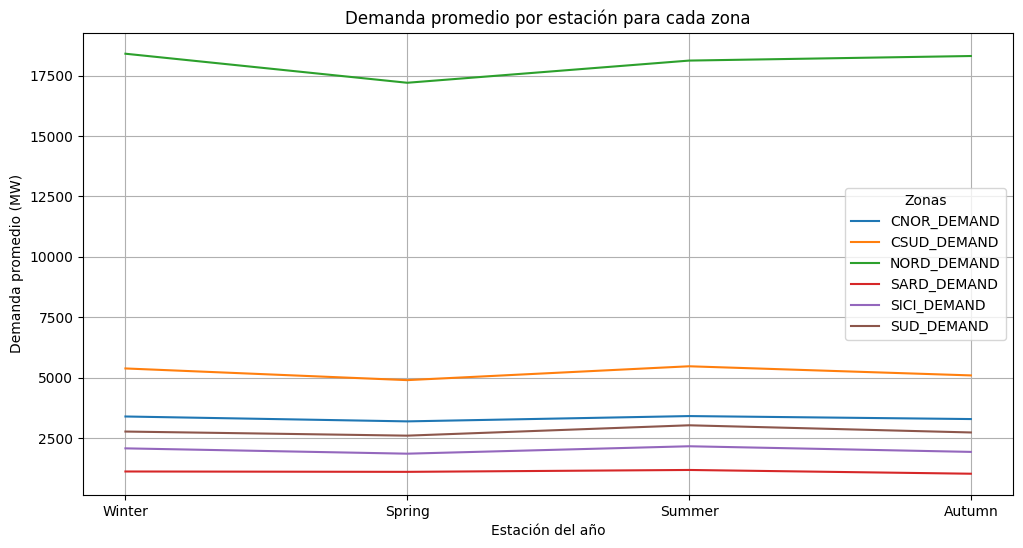

In [472]:
# PREGUNTA 5 ¿En qué estación del año la demanda de electricidad es más alta o más baja en cada zona?

# Asegurarse de que las estaciones estén en el orden correcto
estaciones_ordenadas = ['Winter', 'Spring', 'Summer', 'Autumn']

# Convertir la columna 'SEASON' en una categoría con el orden especificado
df['SEASON'] = pd.Categorical(df['SEASON'], categories=estaciones_ordenadas, ordered=True)

# Crear un diccionario para almacenar los resultados
resultados_demanda_estacion = {}

# Iterar sobre las zonas de demanda
for zona in zonas_demanda:
    # Agrupar por estación y calcular la demanda promedio
    demanda_promedio_por_estacion = df.groupby('SEASON', observed=True)[zona].mean()
    
    # Encontrar la estación con la demanda más alta y más baja
    estacion_max = demanda_promedio_por_estacion.idxmax()
    demanda_max = demanda_promedio_por_estacion.max()
    estacion_min = demanda_promedio_por_estacion.idxmin()
    demanda_min = demanda_promedio_por_estacion.min()

    # Almacenar el resultado
    resultados_demanda_estacion[zona] = {
        'Estación con mayor demanda': estacion_max,
        'Demanda máxima': demanda_max,
        'Estación con menor demanda': estacion_min,
        'Demanda mínima': demanda_min
    }

# Convertir los resultados en un DataFrame para mejor visualización
resultados_demanda_estacion_df = pd.DataFrame.from_dict(resultados_demanda_estacion, orient='index')

# Mostrar los resultados
print(resultados_demanda_estacion_df)

# Graficar la demanda promedio por estación
plt.figure(figsize=(12, 6))
for zona in zonas_demanda:
    # Calculamos la demanda promedio por estación
    demanda_promedio = df.groupby('SEASON', observed=True)[zona].mean()
    plt.plot(demanda_promedio.index, demanda_promedio.values, label=zona)

plt.title('Demanda promedio por estación para cada zona')
plt.xlabel('Estación del año')
plt.ylabel('Demanda promedio (MW)')
plt.legend(title="Zonas")
plt.grid(True)
plt.show()



### Comparación entre precios y demanda:
1.	¿Los picos de precios coinciden con los picos de demanda?
2.	¿Qué zonas tienen la mayor variabilidad (diferencia entre máximos y mínimos) en precios y demanda?
3.	¿Cuál es la relación entre los precios y la demanda durante los momentos de mayor consumo (horas pico)?



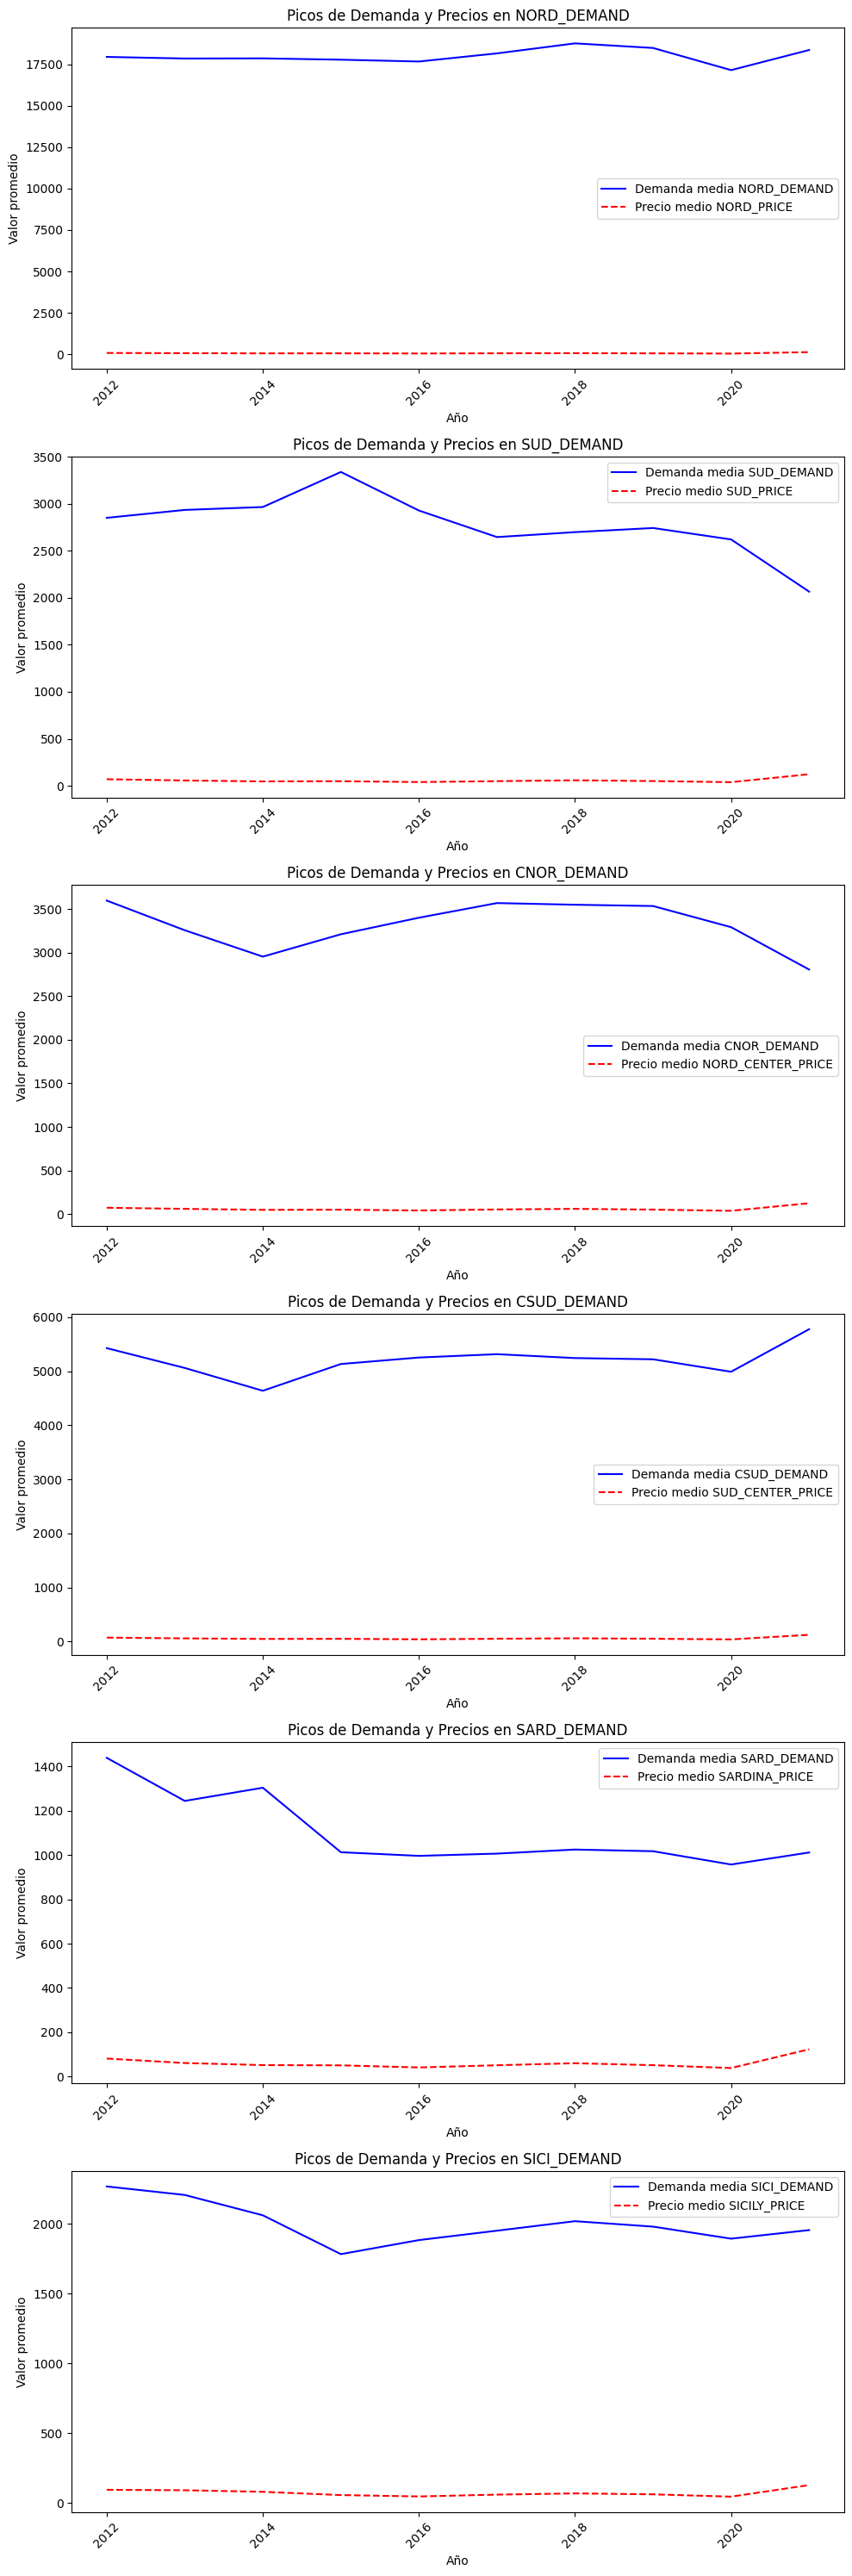

In [473]:
# PREGUNTA 1 ¿Los picos de precios coinciden con los picos de demanda?

# Crear un diccionario que mapea cada zona de demanda con la zona de precio correspondiente
zonas_correspondientes = {
    "NORD_DEMAND": "NORD_PRICE",
    "SUD_DEMAND": "SUD_PRICE",
    "CNOR_DEMAND": "NORD_CENTER_PRICE",
    "CSUD_DEMAND": "SUD_CENTER_PRICE",
    "SARD_DEMAND": "SARDINA_PRICE",
    "SICI_DEMAND": "SICILY_PRICE"  
}

# Crear una figura y subgráficas
fig, axes = plt.subplots(nrows=len(zonas_correspondientes), ncols=1, figsize=(10, 5 * len(zonas_correspondientes)))

# Asegurarse de que 'axes' es una lista, incluso si hay solo un gráfico
if len(zonas_correspondientes) == 1:
    axes = [axes]

# Iterar sobre las zonas para crear los gráficos
for i, zona_demanda in enumerate(zonas_correspondientes.keys()):
    zona_precio = zonas_correspondientes[zona_demanda]  # Obtener la zona de precio correspondiente

    # Calcular la media por año para cada zona de demanda y precios
    demanda_media_anual = df.groupby('YEAR')[zona_demanda].mean()
    precio_media_anual = df.groupby('YEAR')[zona_precio].mean()

    # Crear el gráfico para cada zona
    axes[i].plot(demanda_media_anual.index, demanda_media_anual, label=f'Demanda media {zona_demanda}', color='blue')
    axes[i].plot(precio_media_anual.index, precio_media_anual, label=f'Precio medio {zona_precio}', color='red', linestyle='--')

    # Etiquetas y título
    axes[i].set_title(f'Picos de Demanda y Precios en {zona_demanda}')
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Valor promedio')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre subgráficas y mostrar
plt.tight_layout()
plt.show()

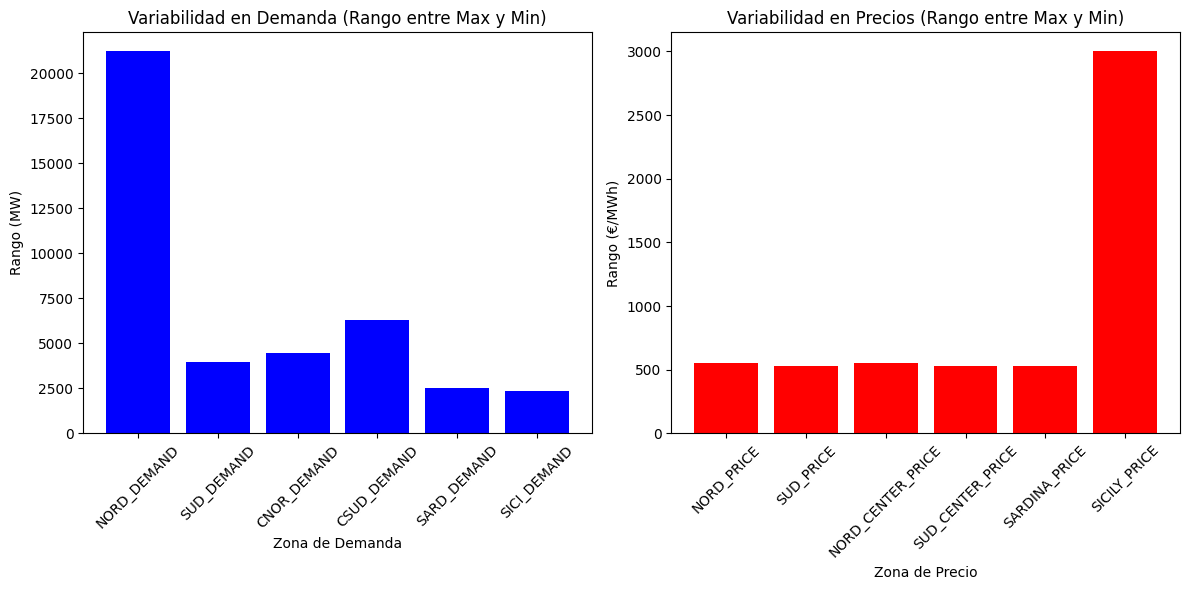

In [474]:
# PREGUNTA 2 ¿Qué zonas tienen la mayor variabilidad (diferencia entre máximos y mínimos) en precios y demanda?

# Calcular la variabilidad (diferencia entre máximo y mínimo) en demanda y precios para cada zona
variabilidad_demanda = {}
variabilidad_precio = {}

for zona_demanda in zonas_correspondientes.keys():
    zona_precio = zonas_correspondientes[zona_demanda]  # Obtener la zona de precio correspondiente
    
    # Calcular la variabilidad de la demanda: diferencia entre máximo y mínimo
    variabilidad_demanda[zona_demanda] = df[zona_demanda].max() - df[zona_demanda].min()

    # Calcular la variabilidad de los precios: diferencia entre máximo y mínimo
    variabilidad_precio[zona_precio] = df[zona_precio].max() - df[zona_precio].min()

# Crear un gráfico de barras para visualizar las variabilidades
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar la variabilidad en la demanda
axes[0].bar(variabilidad_demanda.keys(), variabilidad_demanda.values(), color='blue')
axes[0].set_title('Variabilidad en Demanda (Rango entre Max y Min)')
axes[0].set_xlabel('Zona de Demanda')
axes[0].set_ylabel('Rango (MW)')
axes[0].tick_params(axis='x', rotation=45)

# Graficar la variabilidad en los precios
axes[1].bar(variabilidad_precio.keys(), variabilidad_precio.values(), color='red')
axes[1].set_title('Variabilidad en Precios (Rango entre Max y Min)')
axes[1].set_xlabel('Zona de Precio')
axes[1].set_ylabel('Rango (€/MWh)')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre subgráficas y mostrar
plt.tight_layout()
plt.show()

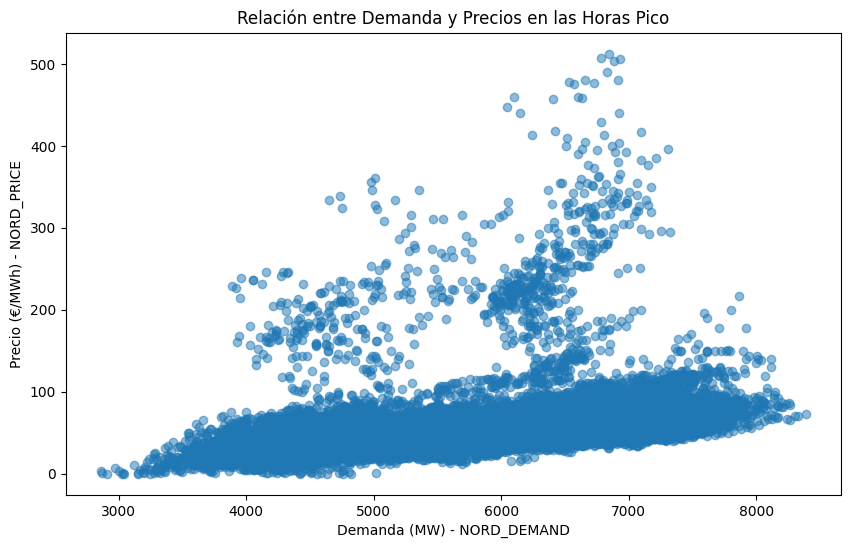

Correlación entre demanda y precios en las horas pico para NORD_DEMAND: 0.28678832243666297


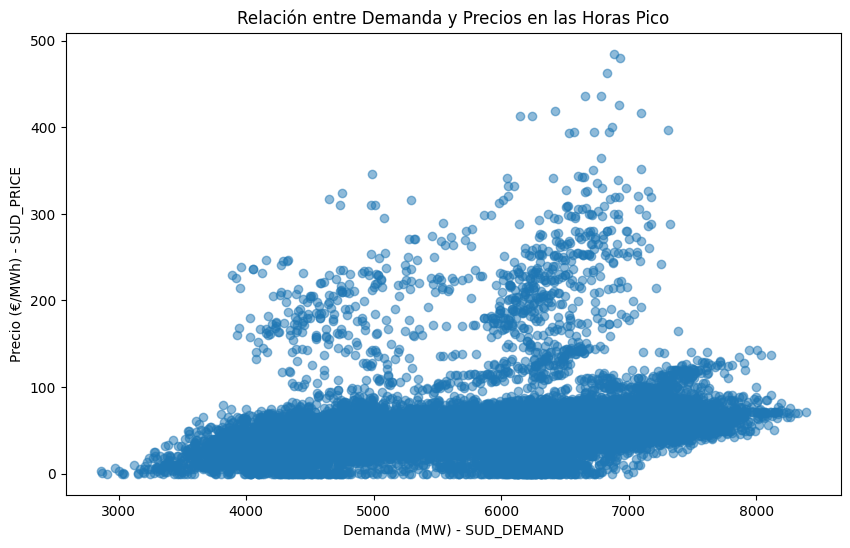

Correlación entre demanda y precios en las horas pico para SUD_DEMAND: 0.22750471690039356


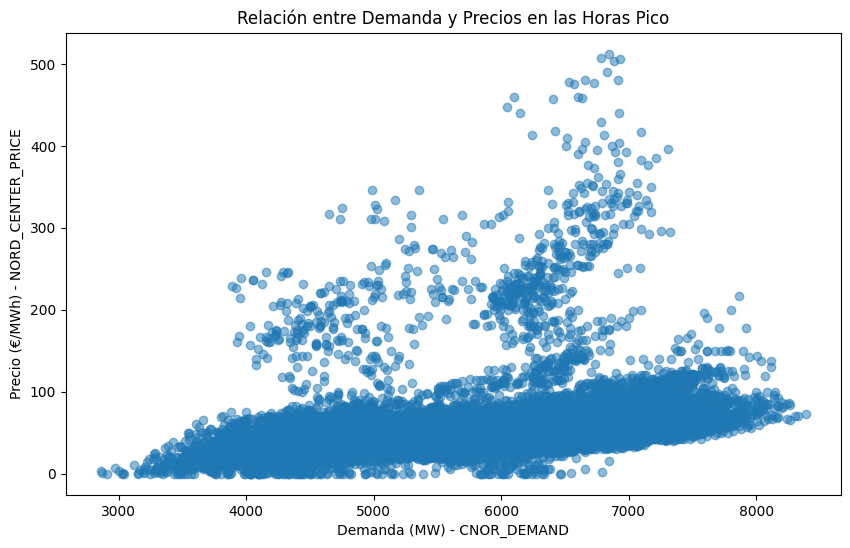

Correlación entre demanda y precios en las horas pico para CNOR_DEMAND: 0.2782238716021704


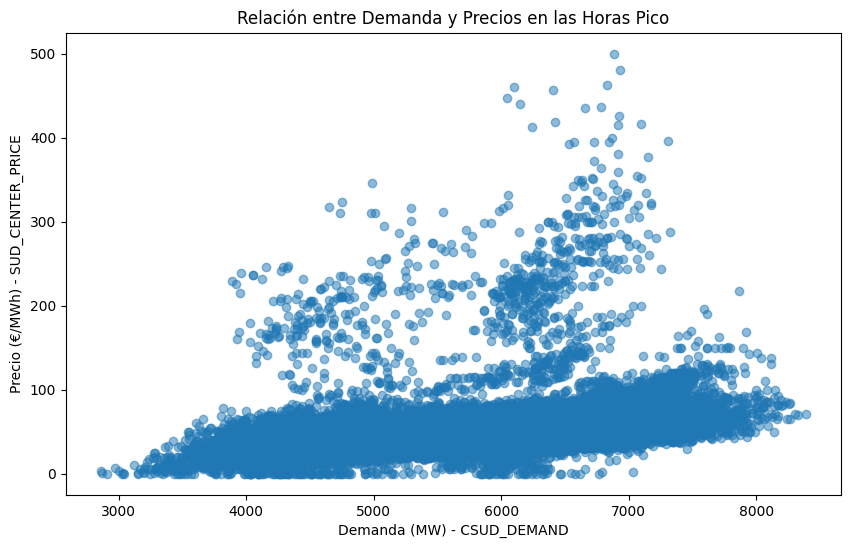

Correlación entre demanda y precios en las horas pico para CSUD_DEMAND: 0.2640274154361585


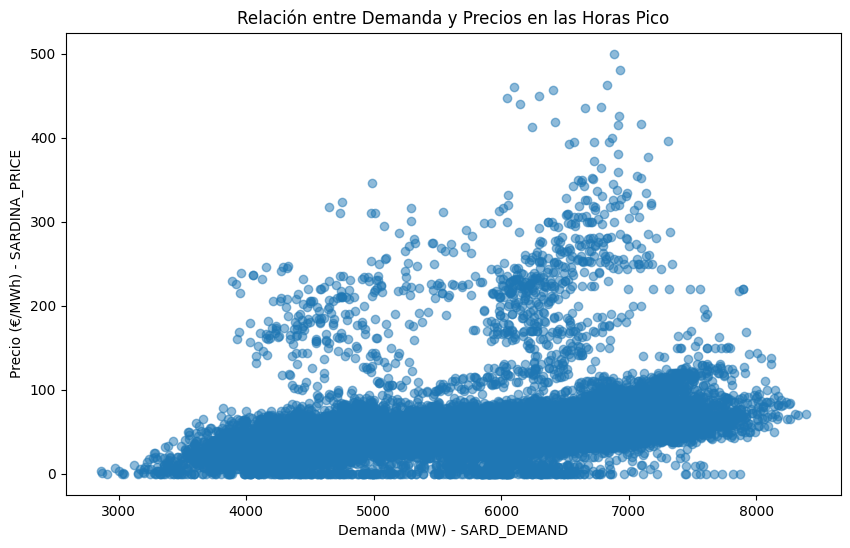

Correlación entre demanda y precios en las horas pico para SARD_DEMAND: 0.25970307626603795


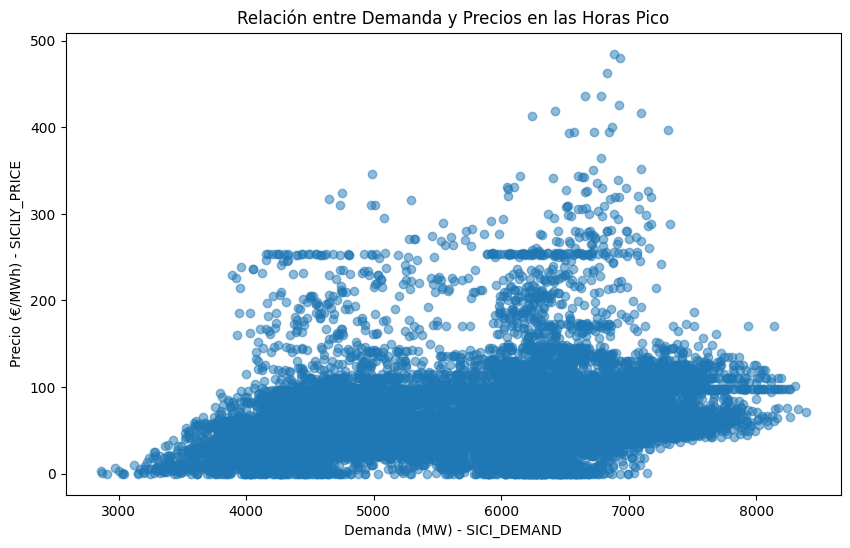

Correlación entre demanda y precios en las horas pico para SICI_DEMAND: 0.2108708079166816


In [475]:
# PREGUNTA 3 ¿Cuál es la relación entre los precios y la demanda durante los momentos de mayor consumo (horas pico)?
# Calcular la demanda promedio por cada hora del día
df['DEMAND'] = df[zonas_demanda].mean(axis=1)  # Promedio de demanda por fila

# Calcular la demanda promedio para cada 'TIME_OF_DAY'
promedio_demanda = df.groupby('TIME_OF_DAY', observed=True)['DEMAND'].mean()

# Encontrar el período con la mayor demanda promedio
hora_pico = promedio_demanda.idxmax()

# Filtrar los datos para las horas pico
picos = df[df['TIME_OF_DAY'] == hora_pico]

# Graficar la relación entre demanda y precios por cada zona durante las horas pico
for zona_demanda in zonas_correspondientes.keys():
    zona_precio = zonas_correspondientes[zona_demanda]  # Obtener la zona de precio correspondiente
    
    # Filtrar los datos de la demanda y precios para la zona durante las horas pico
    picos_zona = picos[['DEMAND', zona_precio]]  # Datos de demanda y precio en las horas pico
    
    # Graficar la relación entre demanda y precios durante las horas pico
    plt.figure(figsize=(10, 6))
    plt.scatter(picos_zona['DEMAND'], picos_zona[zona_precio], alpha=0.5)
    plt.title(f'Relación entre Demanda y Precios en las Horas Pico')
    plt.xlabel(f'Demanda (MW) - {zona_demanda}')
    plt.ylabel(f'Precio (€/MWh) - {zona_precio}')
    plt.show()
    
    # Calcular la correlación entre demanda y precios durante las horas pico para cada zona
    correlacion = picos_zona['DEMAND'].corr(picos_zona[zona_precio])
    print(f'Correlación entre demanda y precios en las horas pico para {zona_demanda}: {correlacion}')

### Preguntas más complejas:
1.	¿Hay alguna diferencia en el comportamiento de los precios/demanda entre días laborables y fines de semana?
2.	¿Cómo afecta cada estación del año (invierno, verano, etc.) tanto los precios como la demanda en las diferentes zonas?
3.	¿Qué impacto tiene la variabilidad de precios en la demanda de electricidad en cada zona?
4.	¿Qué zona tiene mayor dependencia de los precios nacionales en comparación con sus propios precios locales?


   Zona  Demanda Media (Laborables)  Demanda Media (Fines de Semana)  \
0  CNOR                 3515.557112                      2815.982176   
1  CSUD                 5411.341456                      4695.460375   
2  NORD                19300.097484                     14783.174676   
3  SARD                 1121.005038                      1050.649121   
4  SICI                 2042.531281                      1891.663794   
5   SUD                 2860.322424                      2573.624364   

   Precio Medio (Laborables)  Precio Medio (Fines de Semana)  
0                  63.779232                       54.267402  
1                  63.599777                       56.062899  
2                  75.813517                       69.983651  
3                  60.415377                       54.502843  
4                  62.452712                       55.060395  
5                  63.507874                       54.675919  


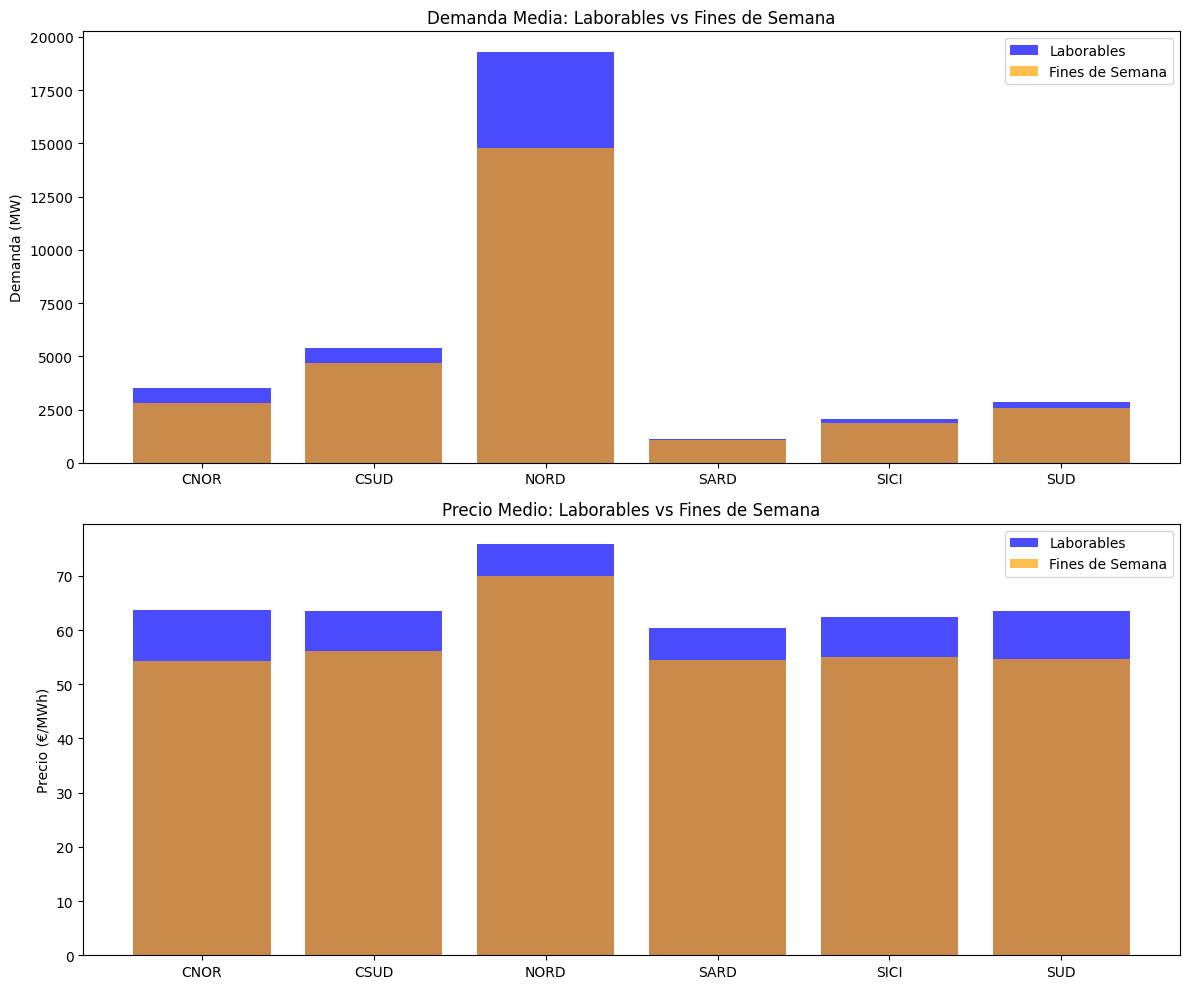

In [476]:
# PREGUNTA 1 ¿Hay alguna diferencia en el comportamiento de los precios/demanda entre días laborables y fines de semana?

# Crear una columna para identificar días laborables y fines de semana
# Supongo que la columna 'DATE' contiene las fechas en formato datetime
df['IS_WEEKEND'] = df['DATE'].dt.dayofweek >= 5  # 5=Sábado, 6=Domingo (True = Fin de semana)

# Calcular la media de precios y demanda para días laborables y fines de semana
resultados = []
for zona_demanda, zona_precio in zip(zonas_demanda, zonas_precio):
    # Media por tipo de día
    laborables = df[~df['IS_WEEKEND']].groupby('IS_WEEKEND')[[zona_demanda, zona_precio]].mean()
    fines_semana = df[df['IS_WEEKEND']].groupby('IS_WEEKEND')[[zona_demanda, zona_precio]].mean()

    # Guardar resultados
    resultados.append({
        'Zona': zona_demanda.replace("_DEMAND", ""),
        'Demanda Media (Laborables)': laborables[zona_demanda].values[0],
        'Demanda Media (Fines de Semana)': fines_semana[zona_demanda].values[0],
        'Precio Medio (Laborables)': laborables[zona_precio].values[0],
        'Precio Medio (Fines de Semana)': fines_semana[zona_precio].values[0]
    })

# Convertir resultados a un DataFrame para visualización
resultados_df = pd.DataFrame(resultados)

# Imprimir los resultados
print(resultados_df)

# Graficar las diferencias
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Demanda
axes[0].bar(resultados_df['Zona'], resultados_df['Demanda Media (Laborables)'], label='Laborables', alpha=0.7, color='blue')
axes[0].bar(resultados_df['Zona'], resultados_df['Demanda Media (Fines de Semana)'], label='Fines de Semana', alpha=0.7, color='orange')
axes[0].set_title('Demanda Media: Laborables vs Fines de Semana')
axes[0].set_ylabel('Demanda (MW)')
axes[0].legend()

# Precios
axes[1].bar(resultados_df['Zona'], resultados_df['Precio Medio (Laborables)'], label='Laborables', alpha=0.7, color='blue')
axes[1].bar(resultados_df['Zona'], resultados_df['Precio Medio (Fines de Semana)'], label='Fines de Semana', alpha=0.7, color='orange')
axes[1].set_title('Precio Medio: Laborables vs Fines de Semana')
axes[1].set_ylabel('Precio (€/MWh)')
axes[1].legend()

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

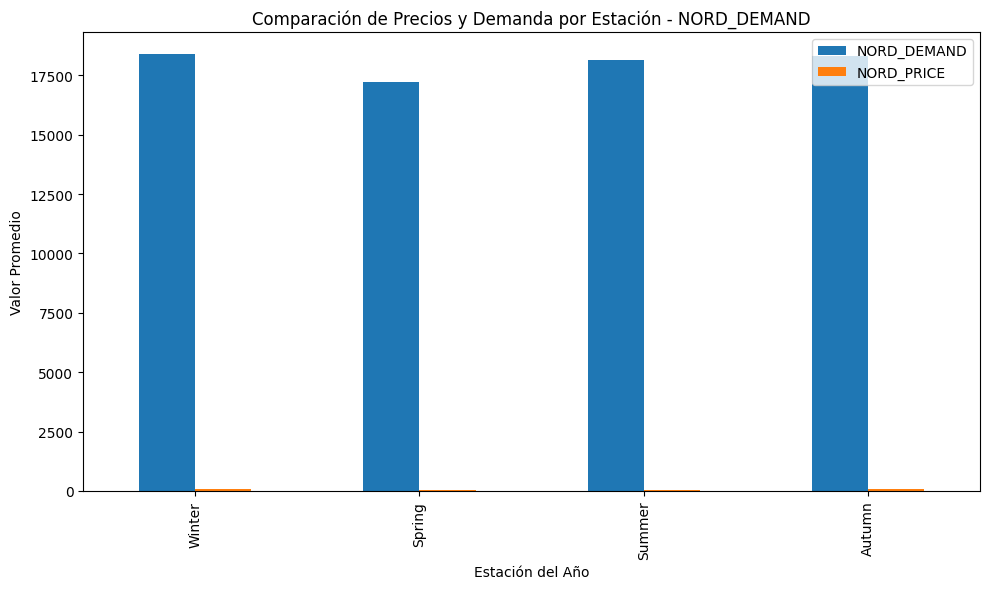

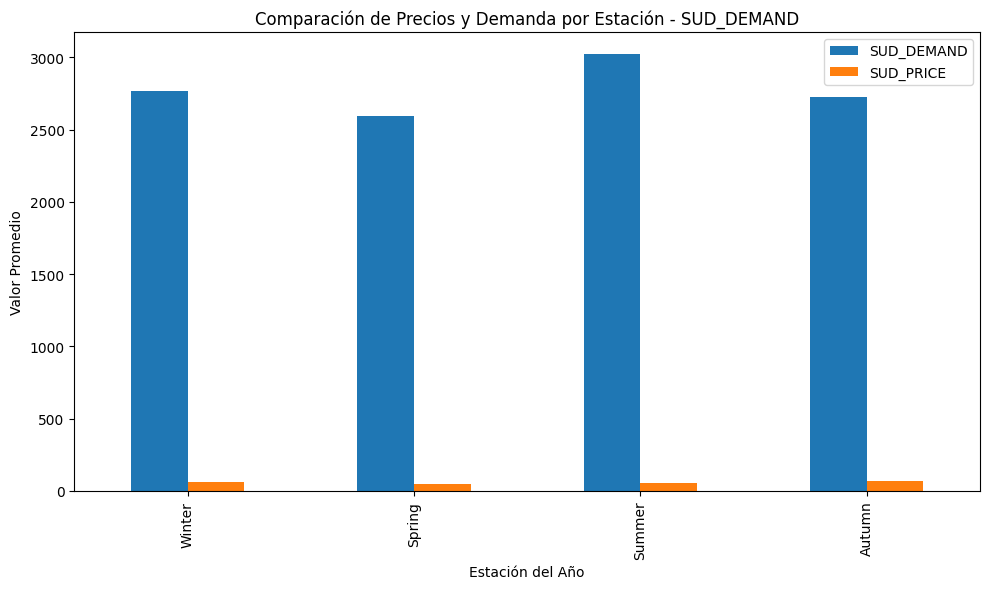

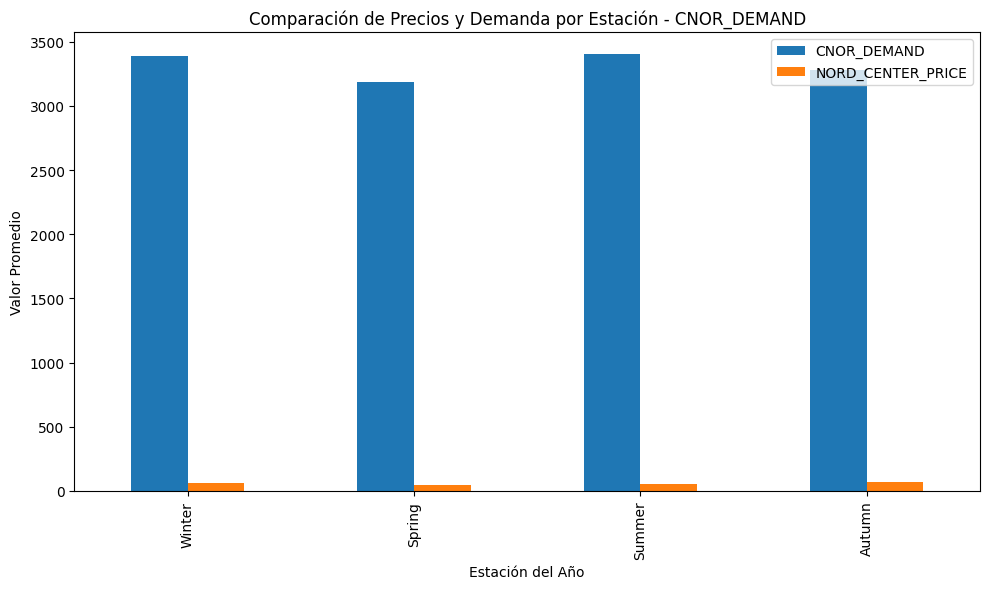

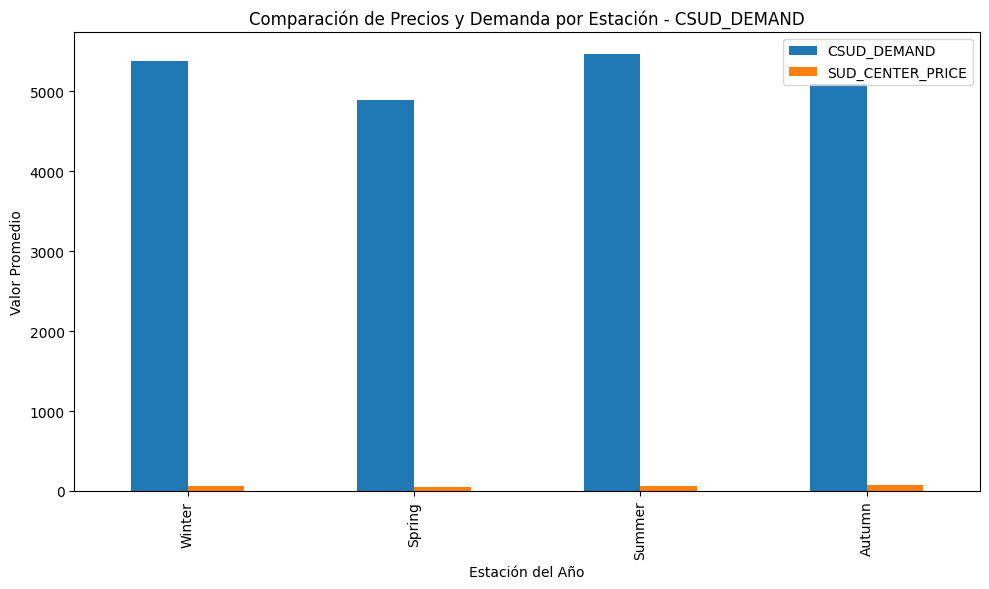

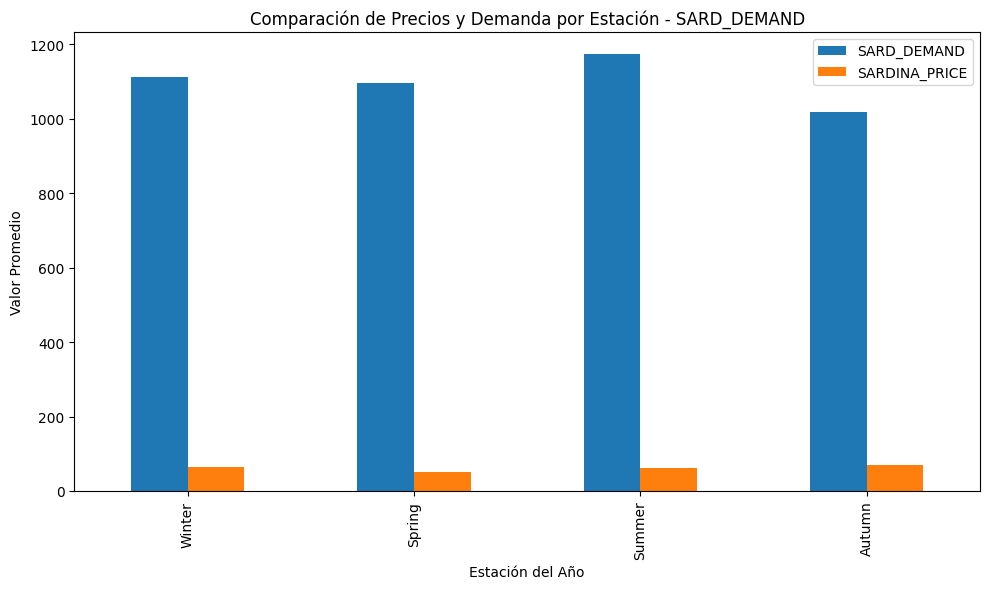

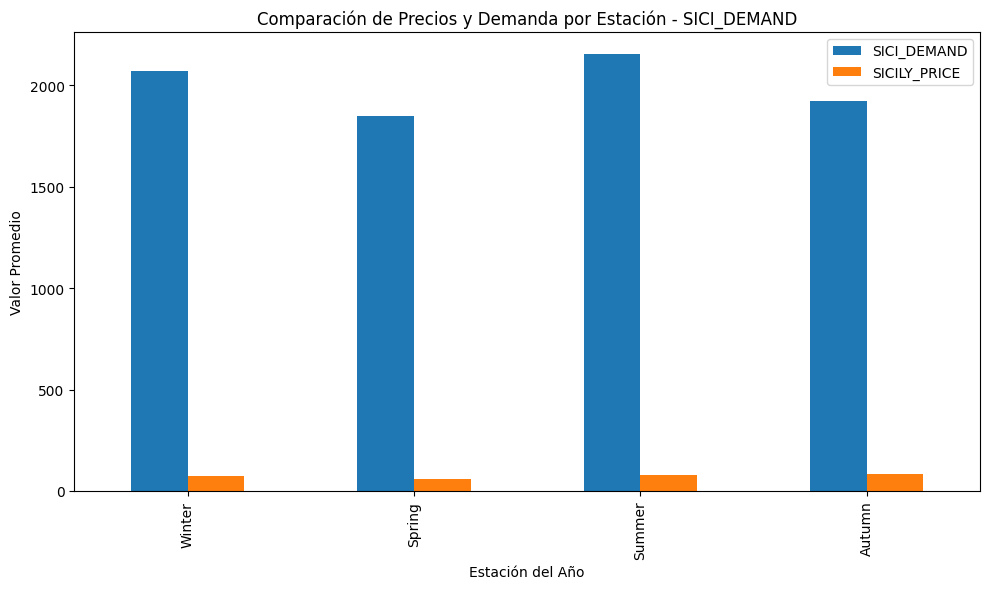


Zona: NORD_DEMAND
         NORD_DEMAND  NORD_PRICE
SEASON                          
Winter  18408.487078   66.226607
Spring  17206.005822   49.978068
Summer  18124.387056   56.432735
Autumn  18313.660875   71.829263

Zona: SUD_DEMAND
         SUD_DEMAND  SUD_PRICE
SEASON                        
Winter  2765.387632  62.153591
Spring  2595.681872  47.299161
Summer  3024.417278  57.112504
Autumn  2727.586240  68.513727

Zona: CNOR_DEMAND
        CNOR_DEMAND  NORD_CENTER_PRICE
SEASON                                
Winter  3388.851292          65.842194
Spring  3186.581510          49.403218
Summer  3406.295755          57.526396
Autumn  3282.546748          71.376104

Zona: CSUD_DEMAND
        CSUD_DEMAND  SUD_CENTER_PRICE
SEASON                               
Winter  5377.996444         64.221096
Spring  4894.168375         49.074940
Summer  5467.843135         58.074319
Autumn  5089.685090         70.176905

Zona: SARD_DEMAND
        SARD_DEMAND  SARDINA_PRICE
SEASON                   

In [477]:
# PREGUNTA 2 ¿Cómo afecta cada estación del año (invierno, verano, etc.) tanto los precios como la demanda en las diferentes zonas?

# Crear un diccionario para almacenar los resultados de cada zona
resultados_estaciones = {}

# Iterar sobre las zonas de demanda y precios
for zona_demanda, zona_precio in zonas_correspondientes.items():
    # Agrupar por estación y calcular la media para cada zona
    resumen = df.groupby('SEASON', observed=True)[[zona_demanda, zona_precio]].mean()
    
    # Guardar el resultado en el diccionario
    resultados_estaciones[zona_demanda] = resumen
    
    # Crear un gráfico para la zona actual
    resumen.plot(kind='bar', figsize=(10, 6), title=f'Comparación de Precios y Demanda por Estación - {zona_demanda}')
    plt.xlabel('Estación del Año')
    plt.ylabel('Valor Promedio')
    plt.tight_layout()
    plt.show()

# Mostrar los resultados calculados para cada zona
for zona, datos in resultados_estaciones.items():
    print(f"\nZona: {zona}")
    print(datos)

### PREGUNTA 3 ¿Qué impacto tiene la variabilidad de precios en la demanda de electricidad en cada zona?

La variabilidad de los precios tiene un impacto directo en la demanda de electricidad en algunas zonas más que en otras. En zonas donde los precios varían mucho, como en "NORD" y "SUD", los consumidores ajustan su consumo según estos cambios, lo que hace que haya una relación más estrecha entre los precios y la demanda. En cambio, en zonas donde los precios no fluctúan tanto, como en "SICI" o "SARD", la demanda no cambia mucho aunque los precios suban o bajen, lo que indica que los consumidores no responden de manera tan sensible a los precios. Esto demuestra que en algunas áreas la gente cambia su comportamiento en respuesta a los precios, pero en otras, la demanda se mantiene bastante estable sin importar las variaciones en los precios.



          Zona Local  Correlación con Precios Nacionales
0         NORD_PRICE                            0.972889
1      SARDINA_PRICE                            0.949156
2       SICILY_PRICE                            0.876060
3          SUD_PRICE                            0.980205
4   SUD_CENTER_PRICE                            0.987146
5  NORD_CENTER_PRICE                            0.982228


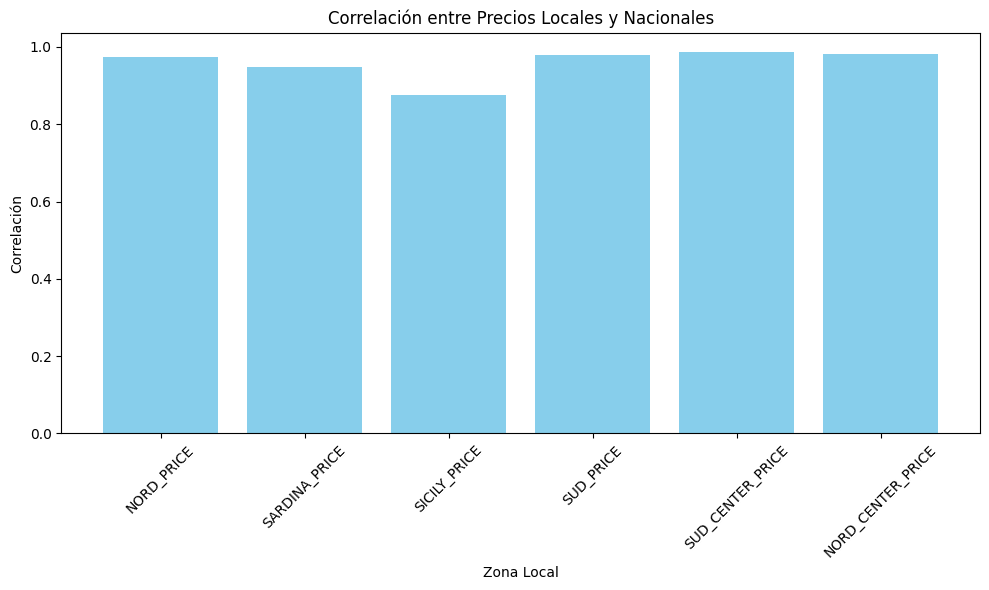

In [478]:
# PREGUNTA 4 ¿Qué zona tiene mayor dependencia de los precios nacionales en comparación con sus propios precios locales?

df['UNIQUE_NATIONAL_PRICE'] = df[zonas_precio].mean(axis=1)

# Crear una lista para almacenar las correlaciones entre precios locales y nacionales
correlaciones_zonas = []

# Iterar sobre las zonas de precios locales y calcular la correlación
for zona_local in zonas_precio:
    precios_locales = df[zona_local]
    precios_nacionales = df['UNIQUE_NATIONAL_PRICE']
    correlacion = precios_locales.corr(precios_nacionales)
    correlaciones_zonas.append((zona_local, correlacion))

# Convertir la lista de correlaciones en un DataFrame
correlaciones_df = pd.DataFrame(correlaciones_zonas, columns=['Zona Local', 'Correlación con Precios Nacionales'])

# Mostrar las correlaciones
print(correlaciones_df)

# Visualización (opcional)
plt.figure(figsize=(10, 6))
plt.bar(correlaciones_df['Zona Local'], correlaciones_df['Correlación con Precios Nacionales'], color='skyblue')
plt.title('Correlación entre Precios Locales y Nacionales')
plt.xlabel('Zona Local')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La conclusión es que todas las zonas tienen una fuerte correlación positiva con los precios nacionales, lo que significa que los precios locales tienden a seguir muy de cerca las variaciones de los precios nacionales. Sin embargo, hay algunas diferencias entre zonas:

Zonas más dependientes de los precios nacionales:

SUD_CENTER_PRICE (0.987) y NORD_CENTER_PRICE (0.982) tienen las correlaciones más altas, lo que indica que los precios en estas zonas están muy alineados con los precios nacionales.
Zonas menos dependientes de los precios nacionales:

SICILY_PRICE (0.876) tiene la correlación más baja, lo que sugiere que los precios en Sicilia pueden tener factores locales que influyen más, como la generación local o limitaciones de transmisión.